In [25]:
import numpy as np

def gen_data(cfg):
    num2 = int(cfg.num / 2)
    d = (cfg.xmax - cfg.xmin)
    
    class1 = []
    class2 = []
    
    for i in range(num2):
        x = np.random.rand() * d - d / 2
        shift = np.random.rand() * cfg.amp
        
        y = cfg.a * x + cfg.b - shift
        
        class1.append((x, y, 0))
        
    for i in range(num2):
        x = np.random.rand() * d - d / 2
        shift = np.random.rand() * cfg.amp
        
        y = cfg.a * x + cfg.b + shift
        
        class2.append((x, y, 1))
        
    return np.array(class1), np.array(class2)
        

In [32]:
%matplotlib notebook
import matplotlib.pyplot as plt

def draw_line(a, b, xmin, xmax, **kwargs):
    xs = list(range(xmin, xmax))
    ys = [a * x + b for x in xs]
    
    plt.plot(xs, ys, **kwargs)

def draw_points(class1, class2):
    plt.scatter(class1[:, 0], class1[:, 1])
    plt.scatter(class2[:, 0], class2[:, 1])

<IPython.core.display.Javascript object>


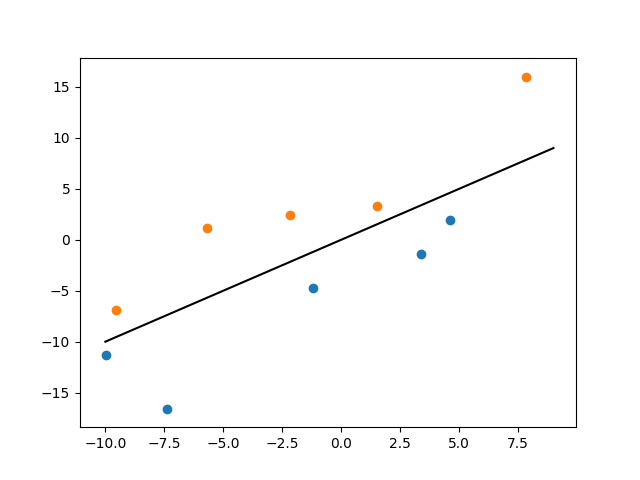

In [54]:
class Config:
    def __init__(self):
        self.a = 1
        self.b = 0
        self.num = 10
        self.xmin = -10
        self.xmax = 10
        self.amp = 10
        
cfg = Config()

train = gen_data(cfg)

plt.figure()
draw_line(cfg.a, cfg.b, xmin, xmax, linestyle="solid", color="black", label="Ground Truth")
draw_points(train[0], train[1])
plt.show()

train_data = np.concatenate([train[0], train[1]])

In [55]:
import tensorflow as tf

x = tf.compat.v1.placeholder(tf.float32, shape=(2))
y = tf.compat.v1.placeholder(tf.float32, shape=(1))

w = tf.Variable(tf.zeros(2))
b = tf.Variable(tf.zeros(1))

c = tf.reduce_sum(tf.multiply(w, x))
d = tf.add(c, b)

result = tf.nn.sigmoid(d)

loss = tf.losses.mean_squared_error(predictions=result, labels=y)

optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(200):
        for i in range(len(train_data)):
            entry = train_data[int(np.random.rand() * len(train_data))]
            sess.run(optimizer, feed_dict={x: np.array(entry[0:2]), y: np.array([entry[2],])})
        
        loss_val = sess.run(loss, feed_dict={x: np.array(entry[0:2]), y: np.array([entry[2],])})
        
        print(epoch, loss_val)
    
    predicted1, predicted2 = sess.run(w)
    predicted3, = sess.run(b)

0 0.19856794
1 0.14540167
2 0.164097
3 0.27410027
4 0.10947044
5 0.0641882
6 0.047170084
7 0.14747436
8 0.0054033333
9 0.054551706
10 0.048827518
11 0.08908781
12 0.039340127
13 0.07555144
14 0.033219613
15 0.09688398
16 0.027896803
17 0.024414202
18 0.035016213
19 0.021767005
20 0.00014839362
21 0.00048438626
22 0.00023933283
23 0.00020350896
24 0.00018697232
25 0.00020114015
26 0.002619222
27 0.014126624
28 0.031270158
29 0.01654632
30 1.3872254e-05
31 0.059767738
32 0.012587093
33 0.06587554
34 0.05997866
35 0.015691895
36 3.4500215e-05
37 0.06352165
38 2.8182125e-05
39 0.00093843014
40 0.00646751
41 0.015345477
42 0.05955966
43 0.010738905
44 2.5500729e-05
45 0.044065226
46 0.07130282
47 0.016594289
48 0.0041490416
49 0.00023386133
50 0.00034341434
51 0.07944788
52 0.015246727
53 0.0777676
54 0.029944055
55 0.052639507
56 0.008596869
57 0.00042764557
58 6.8836825e-06
59 0.0038802053
60 7.1824197e-06
61 3.2010416e-06
62 0.029707035
63 0.0003370487
64 0.038474977
65 1.5403697e-06
66 

0.9076869 -0.04913167


<IPython.core.display.Javascript object>


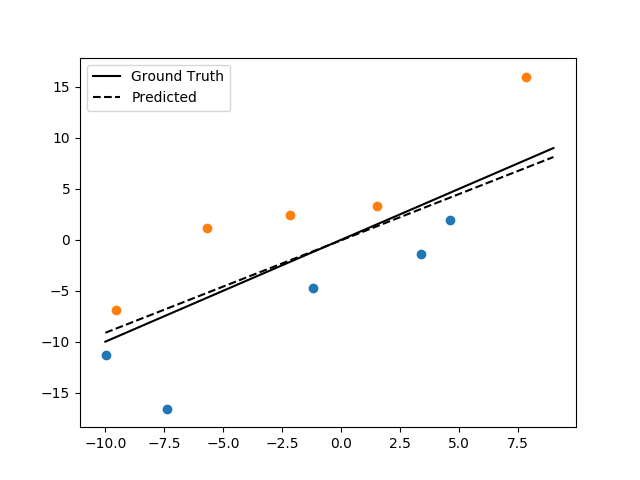

In [56]:
predicted_a = -predicted1 / predicted2
predicted_b = -predicted3 / predicted2

print(predicted_a, predicted_b)

plt.figure()

draw_line(cfg.a, cfg.b, xmin, xmax, linestyle="solid", color="black", label="Ground Truth")
draw_line(predicted_a, predicted_b, xmin, xmax, linestyle="dashed", color="black", label="Predicted")
draw_points(train[0], train[1])

plt.legend()
plt.show()